# オルソ画像のモジュール検出

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# モジュールのインポート
import os
import json
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
import sys
import pickle

In [3]:
# 自作モジュール
sys.path.append("../src")
import module_extraction
from module_extraction import Filters, Modules
import utils

分析対象の指定

In [4]:
# --オルソ画像 --
#input_img_path = '../images/ortho/1391.tif'
#input_img_path = '../images/ortho/1477.tif'
input_img_path = '../images/ortho/1466.tif'
#input_img_path = '../images/ortho/1480.tif'

#input_img_path = '../images/ortho/1411.tif'
#input_img_path = '../images/ortho/1481.tif'
#input_img_path = '../images/ortho/1441.tif'
#input_img_path = '../images/ortho/1473.tif'

In [5]:
# 出力先フォルダの作成
output_dir_path = "../outputs/"+input_img_path.split("/")[-1][:-4]
print(output_dir_path)
os.makedirs(output_dir_path,exist_ok=True)

../outputs/1466


フィルタの適用

In [6]:
filters = Filters()

In [7]:
# 元画像
img_org = cv2.imread(input_img_path, 0)
utils.show_img({"modules":img_org},cmap="gray",figsize=(30,30))

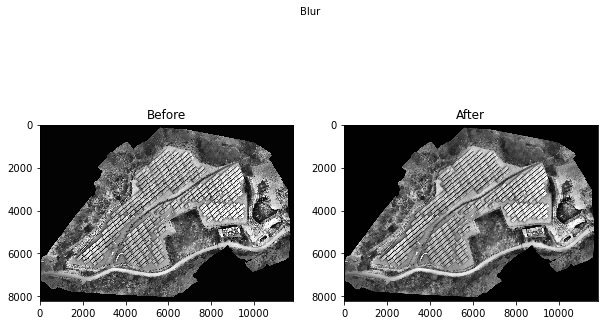

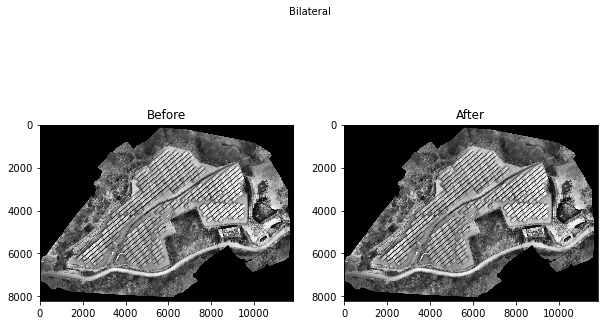

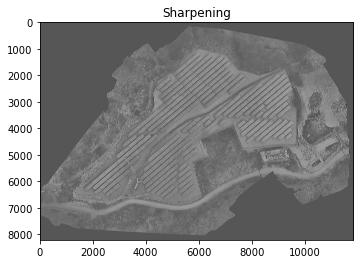

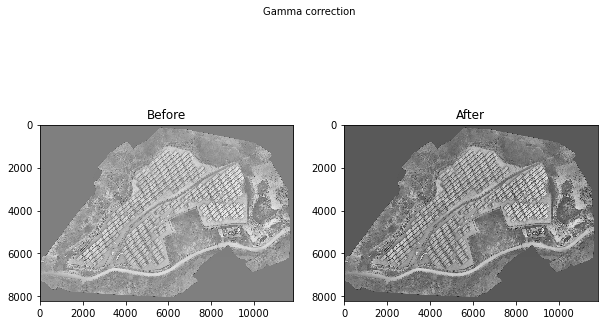

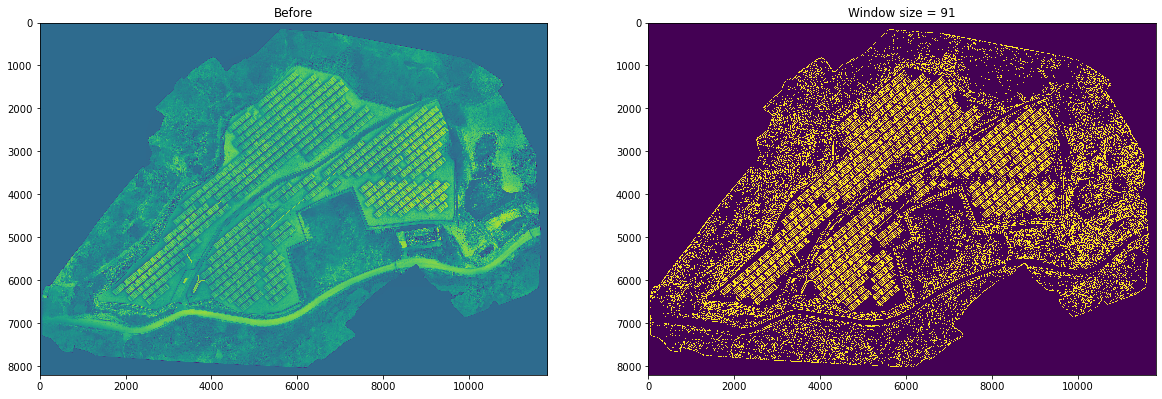

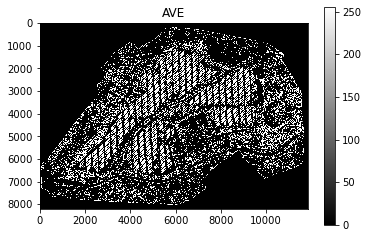

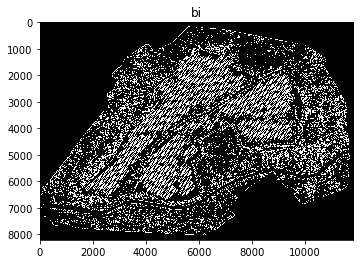

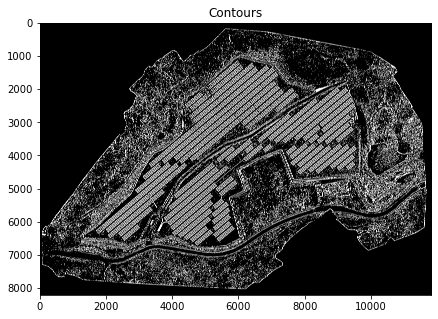

[array([[4460, 7927],
       [4499, 7927],
       [4499, 7952],
       [4460, 7952]]), array([[3957, 7847],
       [3969, 7822],
       [4014, 7844],
       [4002, 7868]]), array([[4800, 7835],
       [4848, 7826],
       [4854, 7855],
       [4806, 7865]]), array([[5228, 7875],
       [5229, 7825],
       [5257, 7826],
       [5255, 7876]]), array([[4183, 7844],
       [4210, 7804],
       [4233, 7819],
       [4206, 7859]]), array([[5166, 7841],
       [5169, 7807],
       [5226, 7814],
       [5223, 7847]]), array([[5245, 7793],
       [5280, 7789],
       [5287, 7856],
       [5251, 7860]]), array([[6286, 7788],
       [6294, 7763],
       [6351, 7779],
       [6343, 7805]]), array([[5127, 7783],
       [5169, 7758],
       [5181, 7779],
       [5139, 7804]]), array([[2013, 7807],
       [2027, 7752],
       [2057, 7760],
       [2043, 7815]]), array([[5094, 7779],
       [5124, 7750],
       [5142, 7769],
       [5111, 7798]]), array([[6201, 7740],
       [6234, 7740],
       [623

In [8]:
# 前処理
candidate_module_contours = filters.get_module_contours(img_org)
print(candidate_module_contours)

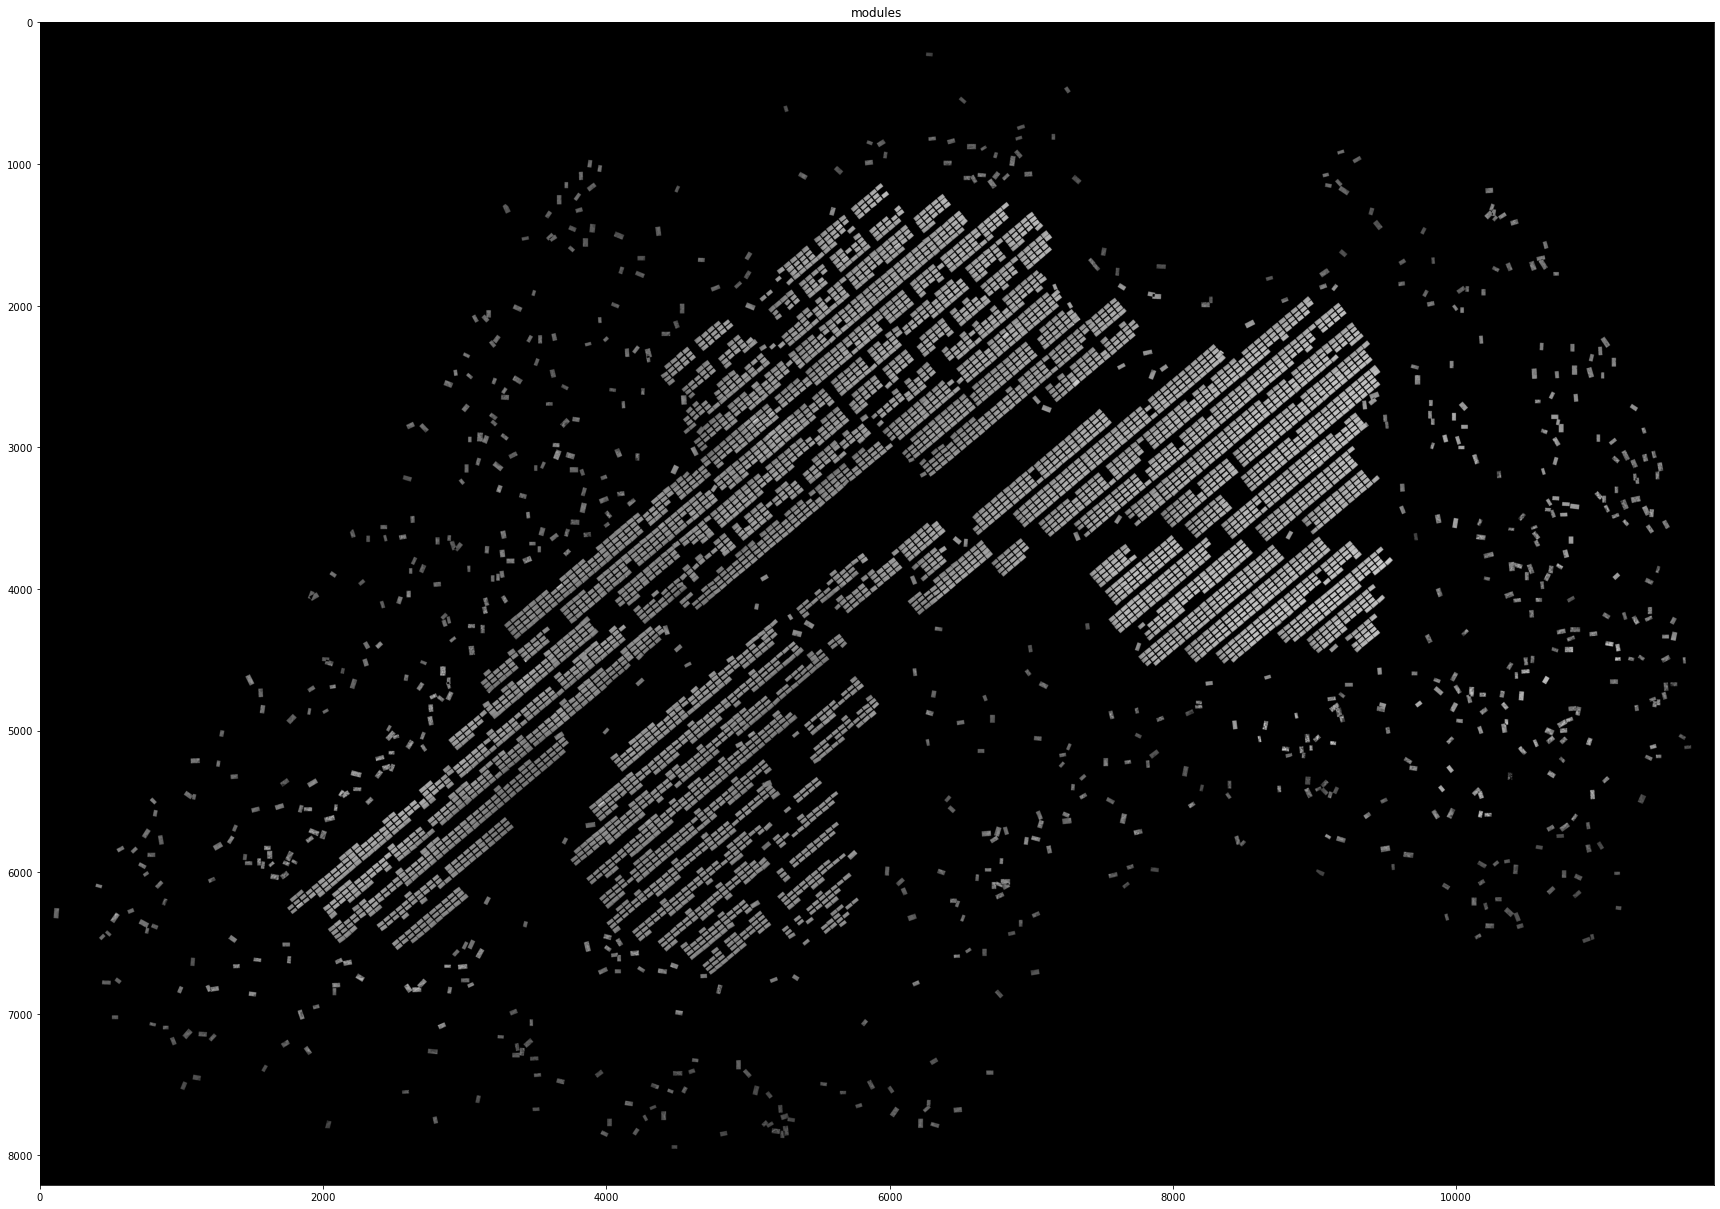

In [9]:
# モジュール抽出画像
img_con = cv2.drawContours(np.zeros_like(img_org), candidate_module_contours, -1, 255, -1)
img_mask = cv2.bitwise_and(img_org, img_con)
utils.show_img({"modules":img_mask},cmap="gray",figsize=(30,30))

In [10]:
# 画像の出力
img_write = cv2.cvtColor(img_mask, cv2.COLOR_BGR2RGB)
cv2.imwrite(output_dir_path+'/img_mask_index_no_dbscan.png',img_write)

True

モジュール候補のクラスタリング

In [11]:
# クラスタのラベルを取得
modules = Modules(candidate_module_contours)
module_labels = modules.get_dbscan_labels(candidate_module_contours, eps=1.25)
print(module_labels[0:300])

[-1 -1 -1  0 -1  0  0 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  2 -1  2 -1  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  3 -1 -1  3 -1 -1 -1  3 -1  3 -1  3  3 -1 -1 -1 -1  3 -1  3 -1  3
  4 -1  3 -1 -1  4 -1 -1 -1  3  4  3 -1  4  4  3  5  6  4  3 -1 -1  4 -1
  5  4  3 -1  6  4  5 -1  3 -1  4  6 -1  5  3  6  7  4  3  5 -1  8  4  6
 -1 -1 -1 -1  3  9  4  6  7  3  5 -1 -1  6  7  8  4  5  3  8  4  6  9  7
  3  6 -1  4  3  8  7 10  4  5  6  8 12  7  9  4  5  3  7 11 -1  4  6 10
  7  3 -1 -1  6  4 12  7 10  3  8  5 -1  8  6 11 -1 10  5  4  3 -1 11  7
 -1  6  4 12  7  3 10 -1  7 12 10  6  8  5  3 11  8  6 -1 -1  5  4 -1  3
 11 -1  4 12  5  6  7 -1 10 -1 11  8 12 10  7  6 -1  5  4 14  3  8 11  6
  5  7  4 10 11  8  4 13 12  5  6  7]


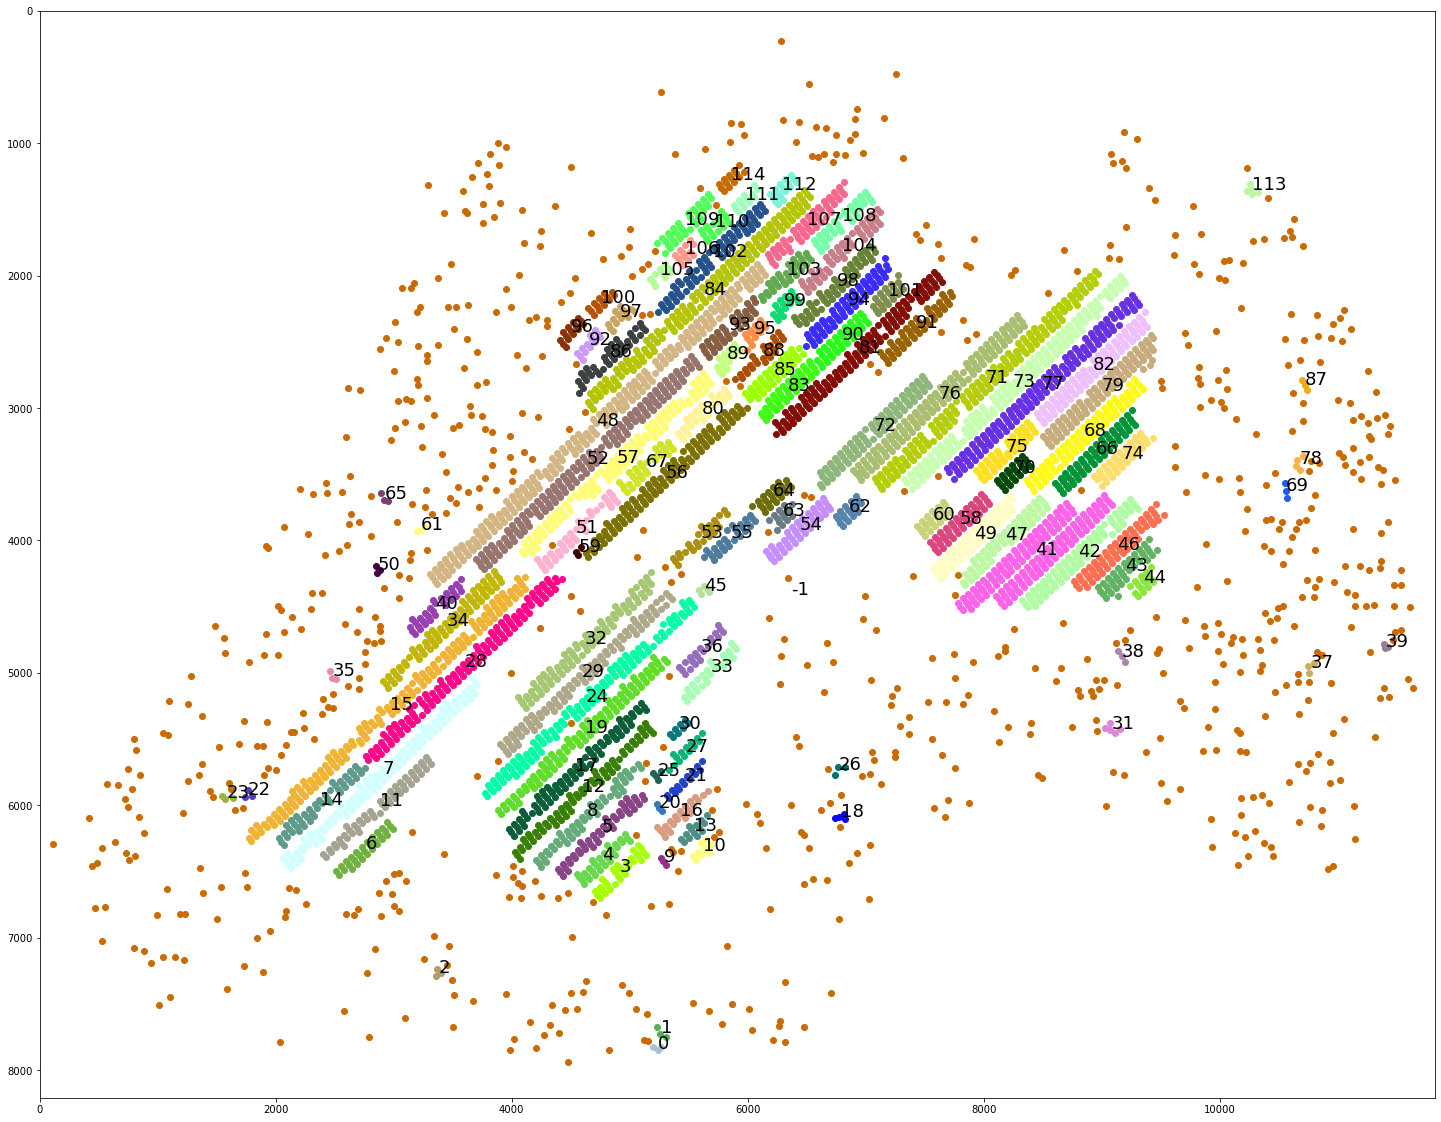

In [12]:
module_extraction.plot_module_map_with_labels(img_org, candidate_module_contours, module_labels)

サイズが大きいクラスタのみを残す

In [13]:
from collections import Counter
counter = Counter(module_labels)

In [14]:
counter.most_common

<bound method Counter.most_common of Counter({-1: 780, 48: 231, 41: 175, 15: 165, 84: 158, 52: 157, 71: 157, 73: 154, 77: 142, 76: 130, 28: 128, 24: 121, 7: 119, 57: 119, 81: 116, 56: 108, 19: 102, 29: 96, 32: 89, 79: 88, 68: 85, 72: 84, 82: 84, 42: 80, 17: 79, 34: 75, 102: 71, 12: 70, 46: 63, 94: 63, 49: 62, 47: 61, 66: 61, 11: 55, 8: 54, 98: 52, 107: 52, 104: 51, 91: 48, 14: 47, 5: 46, 54: 46, 58: 44, 75: 42, 83: 42, 85: 41, 43: 40, 74: 40, 51: 39, 86: 39, 90: 39, 93: 38, 108: 37, 109: 35, 103: 32, 3: 31, 4: 31, 6: 31, 40: 31, 67: 31, 80: 30, 33: 29, 55: 29, 53: 26, 88: 25, 64: 24, 70: 24, 16: 23, 60: 23, 101: 23, 36: 21, 62: 19, 99: 17, 110: 17, 112: 17, 44: 16, 89: 16, 21: 15, 63: 15, 96: 15, 13: 14, 27: 14, 95: 14, 97: 14, 100: 14, 114: 14, 92: 13, 106: 13, 111: 13, 10: 10, 105: 10, 30: 8, 31: 5, 45: 5, 113: 5, 18: 4, 25: 4, 78: 4, 0: 3, 1: 3, 2: 3, 9: 3, 20: 3, 23: 3, 22: 3, 26: 3, 35: 3, 37: 3, 38: 3, 39: 3, 50: 3, 59: 3, 61: 3, 65: 3, 69: 3, 87: 3})>

In [15]:
n_threshold = 10
group_labels = np.array([i for (i, count) in counter.most_common() if i>0 and count>n_threshold ])
group_flags = [label in group_labels for label in module_labels]

サイズの大きいクラスタのみを残してクラスタリングを再実行

In [16]:
# クラスタのラベルを取得
module_contours = np.array(candidate_module_contours)[group_flags]
modules = Modules(module_contours) # 真のモジュール情報に更新
module_labels = modules.get_dbscan_labels(module_contours, eps=1.25)

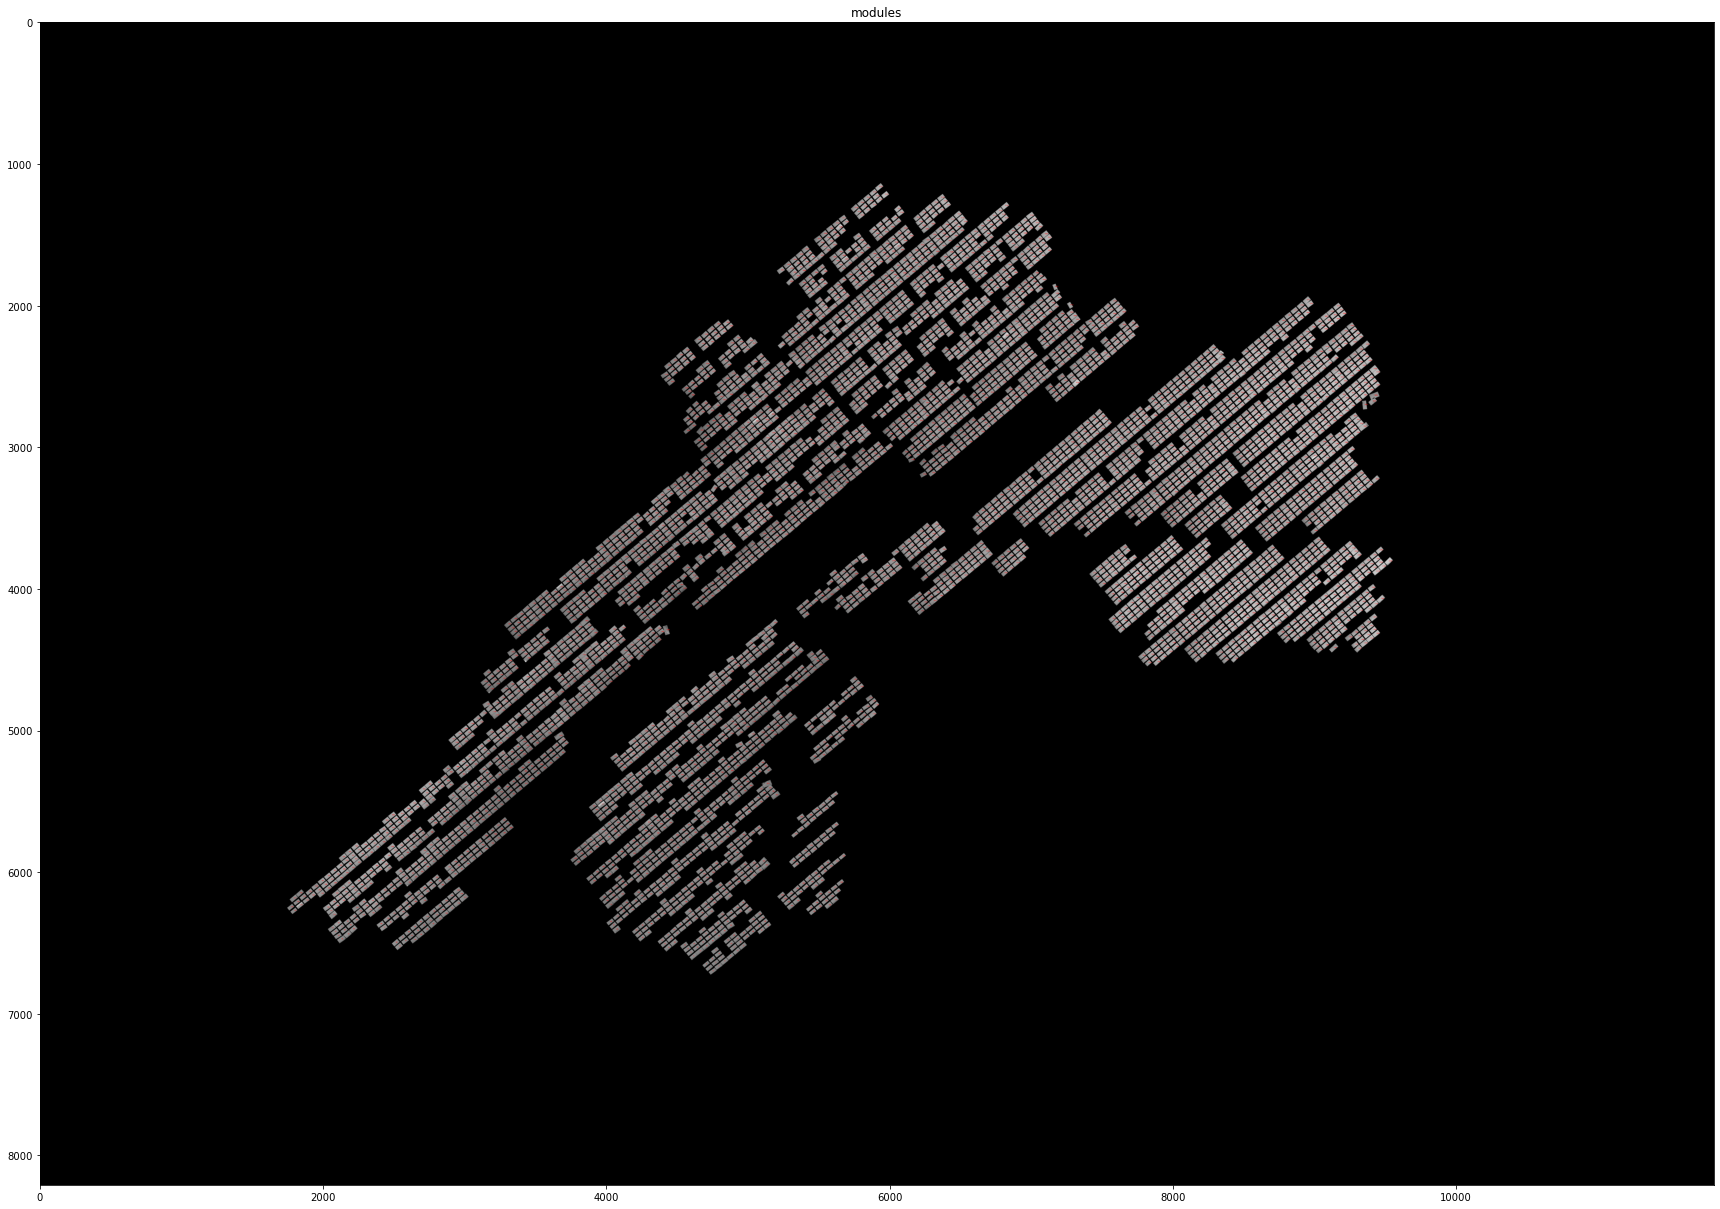

In [17]:
# モジュール抽出画像
img_con = modules.get_img_contours(img_org, index=False)
img_mask = cv2.bitwise_and(img_org, img_con)
img_mask_index = modules.add_index(img_mask)
utils.show_img({"modules":img_mask_index},cmap="gray",figsize=(30,30))

In [18]:
# 画像の出力
img_write = cv2.cvtColor(img_mask_index, cv2.COLOR_BGR2RGB)
cv2.imwrite(output_dir_path+'/img_mask_index.png',img_write)

True

In [19]:
module_extraction.plot_module_map_with_labels(img_org, module_contours, module_labels)

クラスタサイズ調整のための再分割

In [20]:
desired_cluster_size = 50

In [21]:
splitted_module_labels = module_extraction.split_module_labels(
    module_contours, module_labels, desired_cluster_size)

In [22]:
module_extraction.plot_module_map_with_labels(img_org, module_contours, splitted_module_labels)

モジュールデータの保存

In [23]:
# モジュール画像の切り出し＆保存
modules.extract_modules(img_org, output_dir_path)

In [24]:
# モジュール輪郭情報とラベルの保存
with open(output_dir_path+'/module_contours.pkl', 'wb') as pkl:
    pickle.dump(module_contours, pkl)
with open(output_dir_path+'/module_labels.pkl', 'wb') as pkl:
    pickle.dump(module_labels, pkl)    
with open(output_dir_path+'/module_labels_split.pkl', 'wb') as pkl:
    pickle.dump(splitted_module_labels, pkl)    